# Reshma Ankush Bhondave.

# Load Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the Dataset

In [4]:
Iris_dataset=pd.read_csv('C://Users/Rakesh/Downloads/Iris.csv')
Iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
Iris_dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
Iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
# drop the id column and labels column and keep only the features
X = Iris_dataset.drop(columns=['Id','Species'])

In [9]:
# view the features data
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Find Optimum K to represent the Dataset by Elbow method

In [13]:
k_class=[1,2,3,4,5,6,7,8]
k_scores=[]
# compute the score of using differet k
for k in k_class:
    kmean = KMeans(k)
    kmean.fit(X)
    k_score = abs(kmean.score(X))
    k_scores.append(k_score)
    


C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Plot the Elbow method Graph

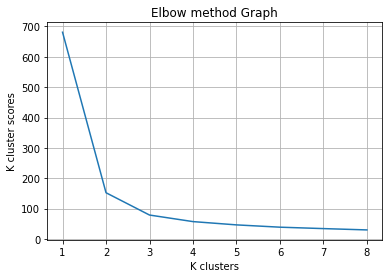

In [15]:
plt.plot(k_class,k_scores)
plt.title('Elbow method Graph')
plt.xlabel('K clusters')
plt.ylabel('K cluster scores')
plt.grid()
plt.show()

# Instantiate the KMeans Model with optimum k clusters which equals to 3 

In [23]:
# inistantiate the model with default parameters
kmeans = KMeans(n_clusters=3)
#training the model
kmeans.fit(X)
print('Training Complete...')

Training Complete...


# Visualize the 3 Clusters

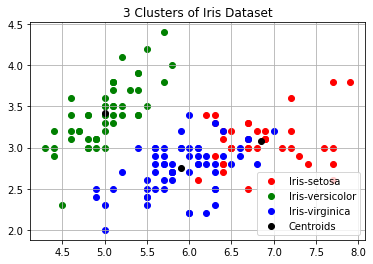

In [27]:
kmeans_centroids_centers = kmeans.cluster_centers_
kmeans_labels = kmeans.predict(X)
unique_labels=np.unique(kmeans_labels)
colors=['r','g','b']
labels_classes=['Iris-setosa','Iris-versicolor','Iris-virginica']
plt.title('3 Clusters of Iris Dataset')
for label in unique_labels:
    color=colors[label]
    label_class = labels_classes[label]
    plt.scatter(X.iloc[kmeans_labels == label,0],X.iloc[kmeans_labels == label,1],color=color,label=label_class)
plt.scatter(kmeans_centroids_centers[:,0],kmeans_centroids_centers[:,1],color='black',label='Centroids')
plt.legend()
plt.grid()
plt.show()